In [3]:
  import gzip
  import shutil

  # Extract the gzipped file
  with gzip.open('/content/facebook_combined.txt.gz', 'rb') as f_in:
      with open('/content/facebook_combined.txt', 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)

  print("File extracted successfully.")


File extracted successfully.


In [4]:
import networkx as nx

# Load graph from edge list
G = nx.read_edgelist('/content/facebook_combined.txt', create_using=nx.Graph())
print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph loaded with 4039 nodes and 88234 edges.


In [5]:
largest_cc = max(nx.connected_components(G), key=len)
G_gc = G.subgraph(largest_cc).copy()
print(f"Giant Component Size: {G_gc.number_of_nodes()} nodes")


Giant Component Size: 4039 nodes


In [6]:
import numpy as np

degrees = [d for n, d in G.degree()]
mean_degree = np.mean(degrees)
print(f"Mean Degree: {mean_degree:.2f}")


Mean Degree: 43.69


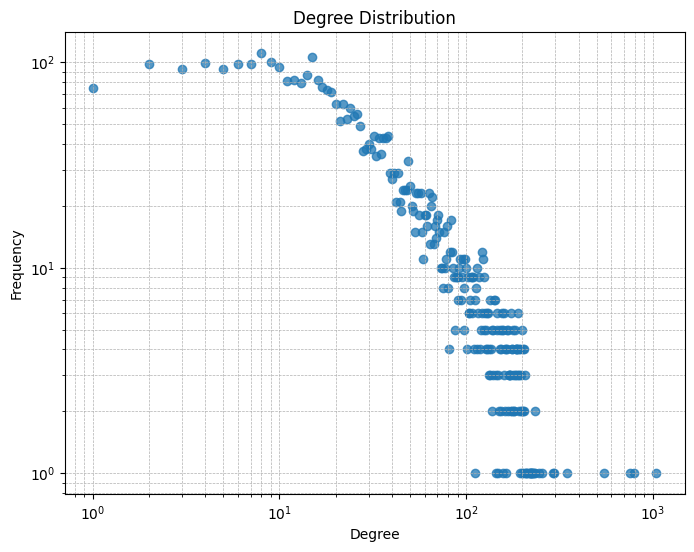

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load your graph (replace with actual path if needed)
G = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# Compute the degree for each node
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Count the frequency of each degree value
degree_counts = {}
for deg in degree_sequence:
    degree_counts[deg] = degree_counts.get(deg, 0) + 1

x = list(degree_counts.keys())
y = list(degree_counts.values())

# Plotting on log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.75)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [ ]:
avg_local_clustering = nx.average_clustering(G)
print(f"Average Local Clustering Coefficient: {avg_local_clustering:.4f}")


Average Local Clustering Coefficient: 0.6055


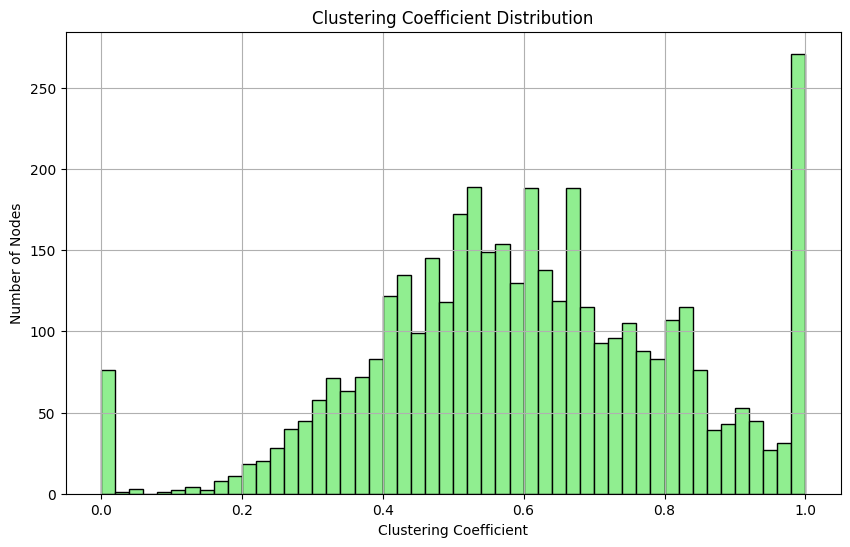

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G is your graph
clustering_coeffs = list(nx.clustering(G).values())

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(clustering_coeffs, bins=50, color='lightgreen', edgecolor='black')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.grid(True)
plt.show()


In [ ]:
global_clustering = nx.transitivity(G)
print(f"Global Clustering Coefficient: {global_clustering:.4f}")


Global Clustering Coefficient: 0.5192


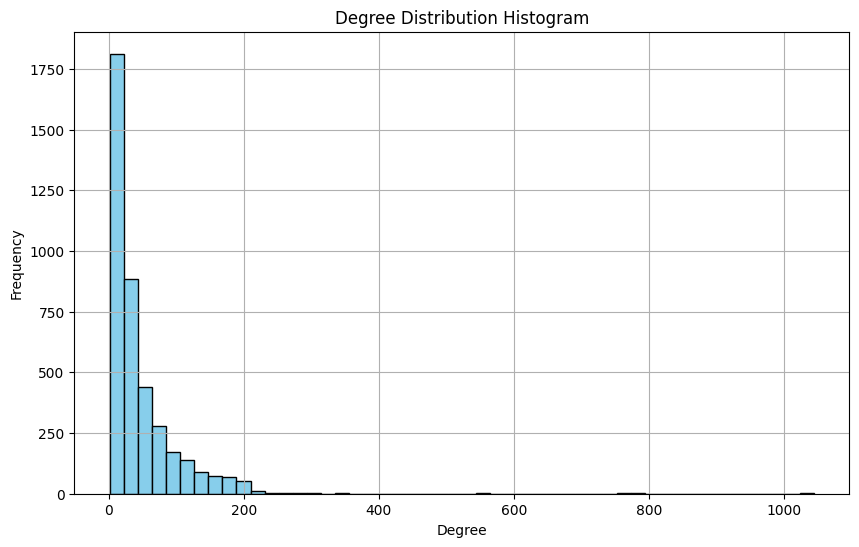

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='skyblue', edgecolor='black')
plt.title('Degree Distribution Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


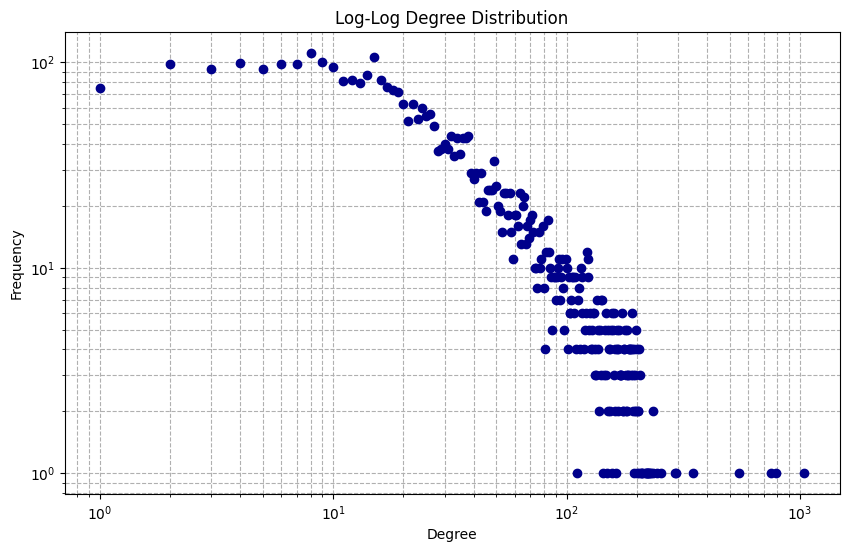

In [ ]:
degree_freq = np.bincount(degrees)
plt.figure(figsize=(10, 6))
plt.loglog(range(len(degree_freq)), degree_freq, marker='o', linestyle='None', color='darkblue')
plt.title('Log-Log Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--")
plt.show()


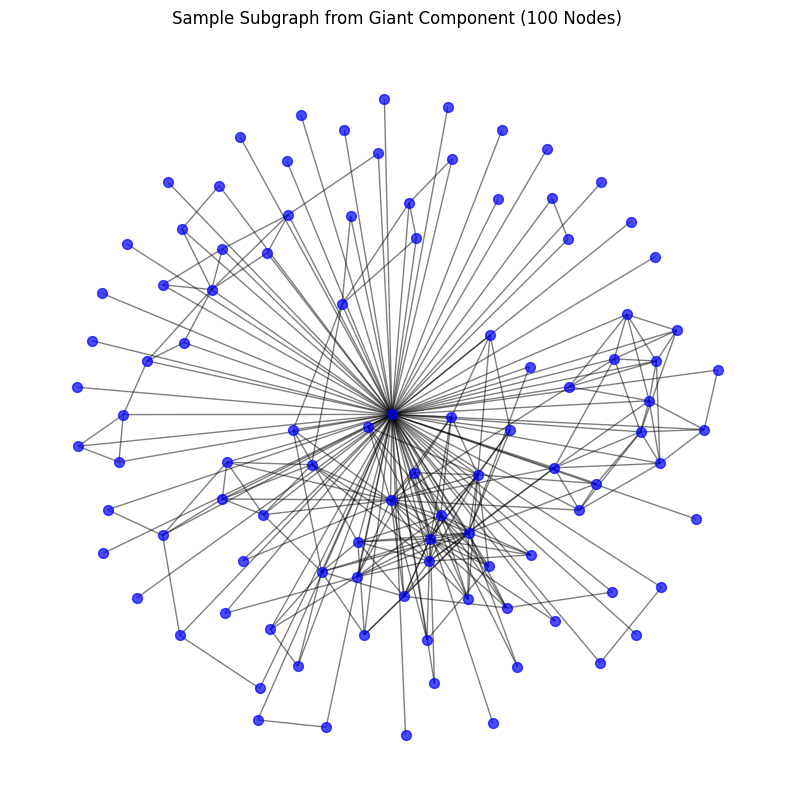

In [ ]:
sample_nodes = list(G_gc.nodes())[:100]  # First 100 nodes from giant component
sample_subgraph = G_gc.subgraph(sample_nodes)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(sample_subgraph, seed=42)
nx.draw_networkx_nodes(sample_subgraph, pos, node_size=50, node_color='blue', alpha=0.7)
nx.draw_networkx_edges(sample_subgraph, pos, alpha=0.5)
plt.title("Sample Subgraph from Giant Component (100 Nodes)")
plt.axis('off')
plt.show()


In [ ]:
import networkx as nx

# Assuming G is your graph
largest_cc = max(nx.connected_components(G), key=len)
giant_component = G.subgraph(largest_cc)

print("Giant Component Size:", giant_component.number_of_nodes())



Giant Component Size: 4039



--- Degree Statistics ---
Degree: Max: 1045, Min: 1, Avg: 43.69, Std Dev: 52.41


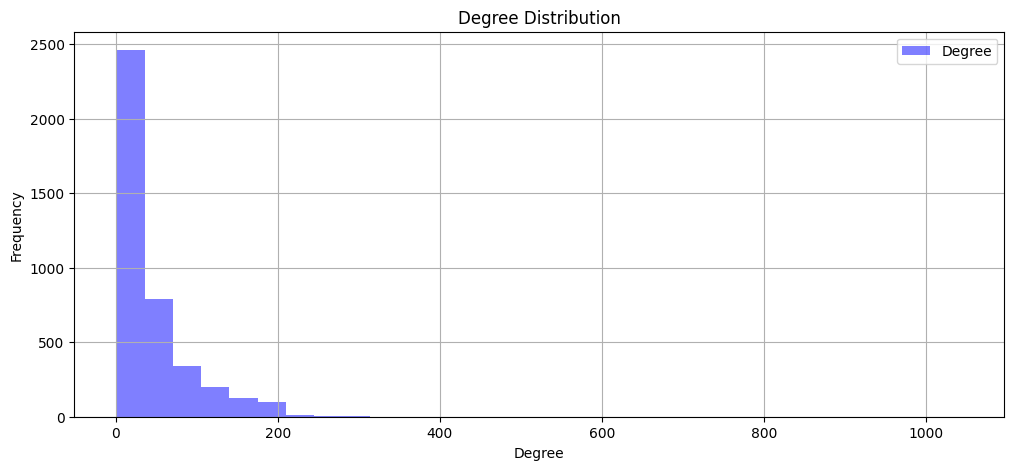


--- Clustering Coefficients ---
Global Clustering Coefficient: 0.5191742775433075
Average Local Clustering Coefficient: 0.6055467186200876


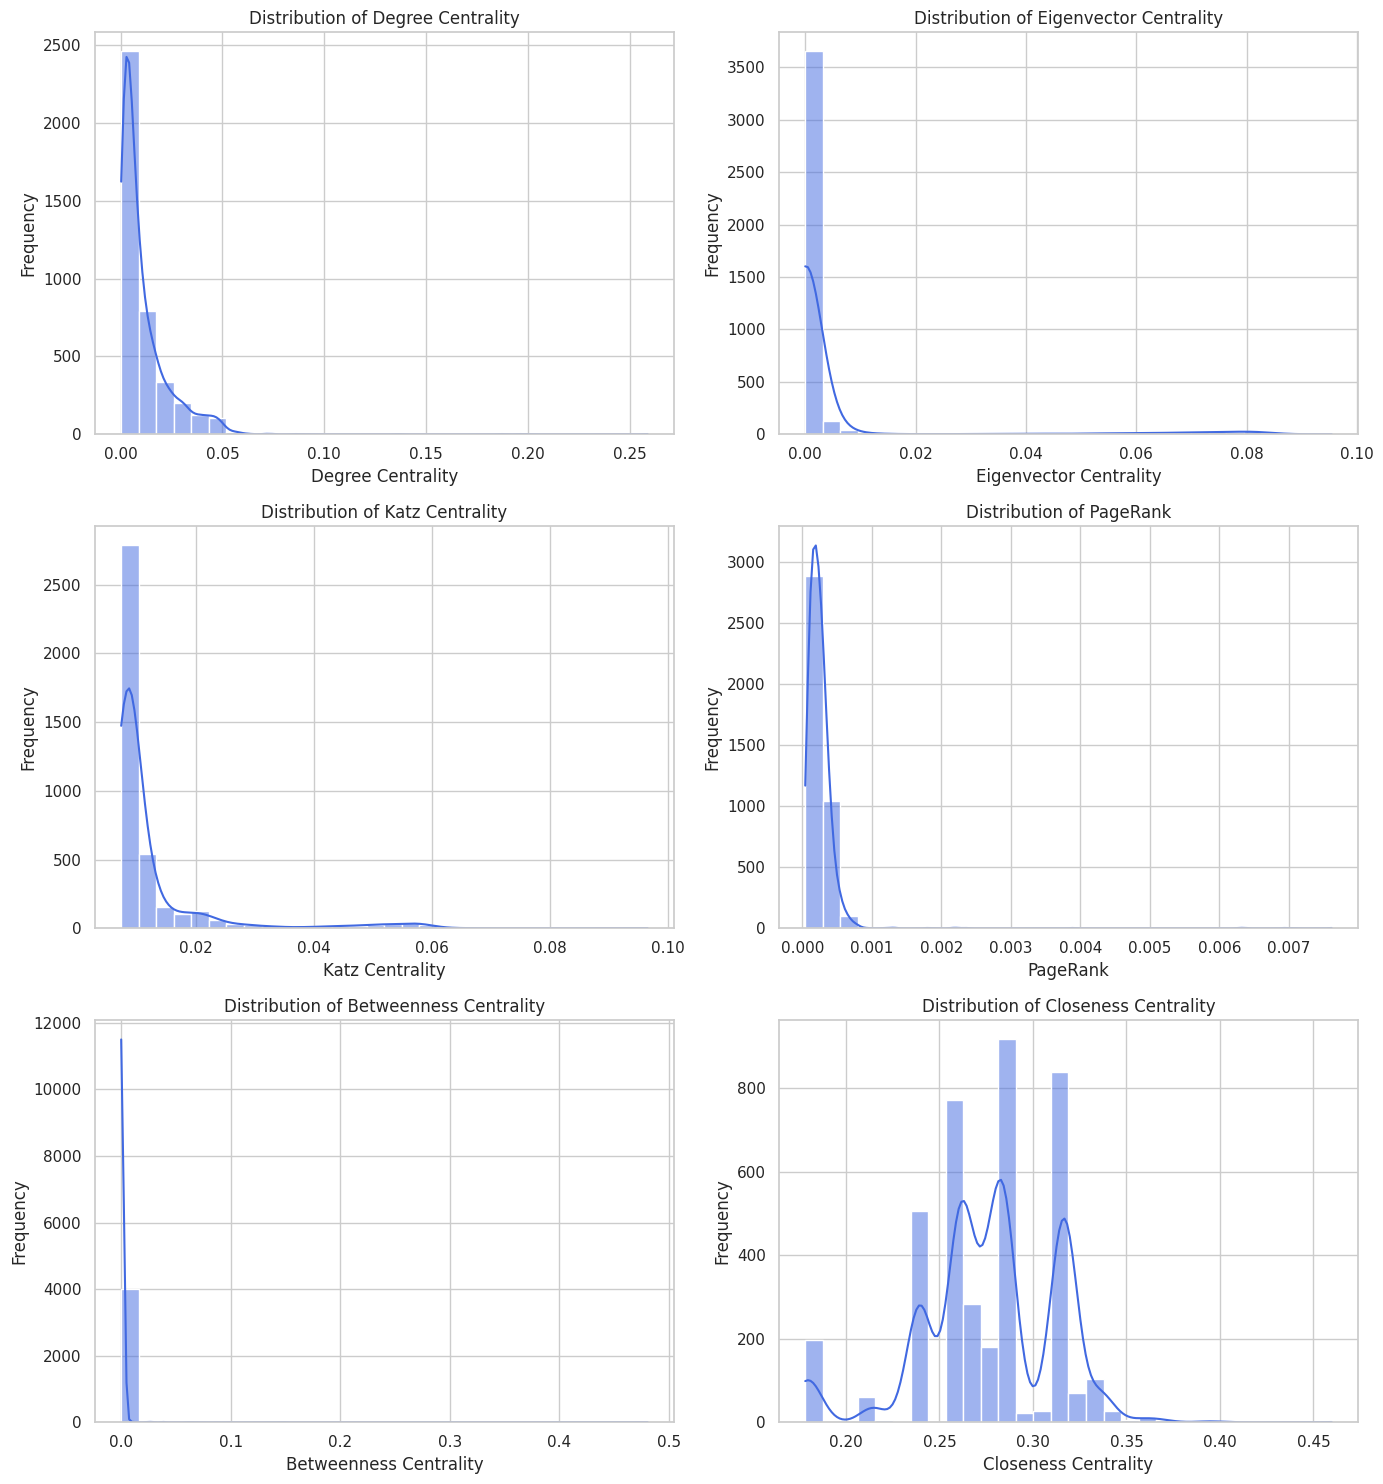

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# -----------------------------
# Load your graph
# -----------------------------
# Replace with your own dataset
G = nx.read_edgelist("/content/facebook_combined.txt", nodetype=int, create_using=nx.Graph())

# -----------------------------
# 1. DEGREE STATISTICS
# -----------------------------

is_directed = G.is_directed()

# Compute degrees
if is_directed:
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    degrees = dict(G.degree())

    in_vals = list(in_degrees.values())
    out_vals = list(out_degrees.values())
    total_vals = list(degrees.values())

    degree_stats = {
        "In-Degree": (max(in_vals), min(in_vals), np.mean(in_vals), np.std(in_vals)),
        "Out-Degree": (max(out_vals), min(out_vals), np.mean(out_vals), np.std(out_vals)),
        "Total Degree": (max(total_vals), min(total_vals), np.mean(total_vals), np.std(total_vals)),
    }
else:
    degrees = dict(G.degree())
    total_vals = list(degrees.values())

    degree_stats = {
        "Degree": (max(total_vals), min(total_vals), np.mean(total_vals), np.std(total_vals)),
    }

# Print degree statistics
print("\n--- Degree Statistics ---")
for dtype, (max_val, min_val, avg, std) in degree_stats.items():
    print(f"{dtype}: Max: {max_val}, Min: {min_val}, Avg: {avg:.2f}, Std Dev: {std:.2f}")

# Plot degree distributions
plt.figure(figsize=(12, 5))
if is_directed:
    plt.hist(in_vals, bins=30, color='green', alpha=0.6, label='In-Degree')
    plt.hist(out_vals, bins=30, color='orange', alpha=0.6, label='Out-Degree')

plt.hist(total_vals, bins=30, color='blue', alpha=0.5, label='Total Degree' if is_directed else 'Degree')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 2. CENTRALITY MEASURES
# -----------------------------

# Degree centralities
deg_centrality = nx.degree_centrality(G)
if is_directed:
    in_deg_centrality = nx.in_degree_centrality(G)
    out_deg_centrality = nx.out_degree_centrality(G)

# Eigenvector
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Katz centrality with adaptive alpha
def compute_alpha(G):
    A = nx.to_numpy_array(G)
    lambda_max = max(abs(np.linalg.eigvals(A)))
    return 0.85 / lambda_max

alpha = compute_alpha(G)
try:
    katz_centrality = nx.katz_centrality(G, alpha=alpha, beta=1.0, max_iter=300, tol=1e-6)
except nx.PowerIterationFailedConvergence:
    katz_centrality = nx.katz_centrality(G, alpha=alpha/2, beta=1.0, max_iter=300, tol=1e-6)

pagerank = nx.pagerank(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

# -----------------------------
# 3. CLUSTERING
# -----------------------------
global_clustering = nx.transitivity(G)
avg_local_clustering = nx.average_clustering(G)

print("\n--- Clustering Coefficients ---")
print("Global Clustering Coefficient:", global_clustering)
print("Average Local Clustering Coefficient:", avg_local_clustering)

# -----------------------------
# 4. RECIPROCITY (for Directed Graphs)
# -----------------------------
if is_directed:
    reciprocity = nx.reciprocity(G)
    print("\n--- Reciprocity ---")
    print("Reciprocity:", reciprocity)

# -----------------------------
# 5. CENTRALITY DATAFRAMES
# -----------------------------

df_list = [
    pd.DataFrame(deg_centrality.items(), columns=["Node", "Degree Centrality"]),
    pd.DataFrame(eigen_centrality.items(), columns=["Node", "Eigenvector Centrality"]),
    pd.DataFrame(katz_centrality.items(), columns=["Node", "Katz Centrality"]),
    pd.DataFrame(pagerank.items(), columns=["Node", "PageRank"]),
    pd.DataFrame(betweenness.items(), columns=["Node", "Betweenness Centrality"]),
    pd.DataFrame(closeness.items(), columns=["Node", "Closeness Centrality"]),
]

titles = [
    "Degree Centrality",
    "Eigenvector Centrality",
    "Katz Centrality",
    "PageRank",
    "Betweenness Centrality",
    "Closeness Centrality",
]

# Add in-degree and out-degree only for directed graphs
if is_directed:
    df_list.insert(1, pd.DataFrame(in_deg_centrality.items(), columns=["Node", "In-Degree Centrality"]))
    df_list.insert(2, pd.DataFrame(out_deg_centrality.items(), columns=["Node", "Out-Degree Centrality"]))
    titles.insert(1, "In-Degree Centrality")
    titles.insert(2, "Out-Degree Centrality")

# -----------------------------
# 6. VISUALIZATION OF CENTRALITY DISTRIBUTIONS
# -----------------------------

sns.set(style="whitegrid")
rows = (len(df_list) + 1) // 2
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(14, 5 * rows))
axes = axes.flatten()

for i, (df, title) in enumerate(zip(df_list, titles)):
    sns.histplot(df.iloc[:, 1], kde=True, bins=30, ax=axes[i], color="royalblue")
    axes[i].set_title(f"Distribution of {title}")
    axes[i].set_xlabel(title)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Top 10 Nodes by Degree Centrality
Rank	Node	Degree Centrality
1	107	0.258791
2	1684	0.196137
3	1912	0.186974
4	3437	0.135463
5	0	0.085934
6	2543	0.072808
7	2347	0.072065
8	1888	0.062902
9	1800	0.060674
10	1663	0.058197


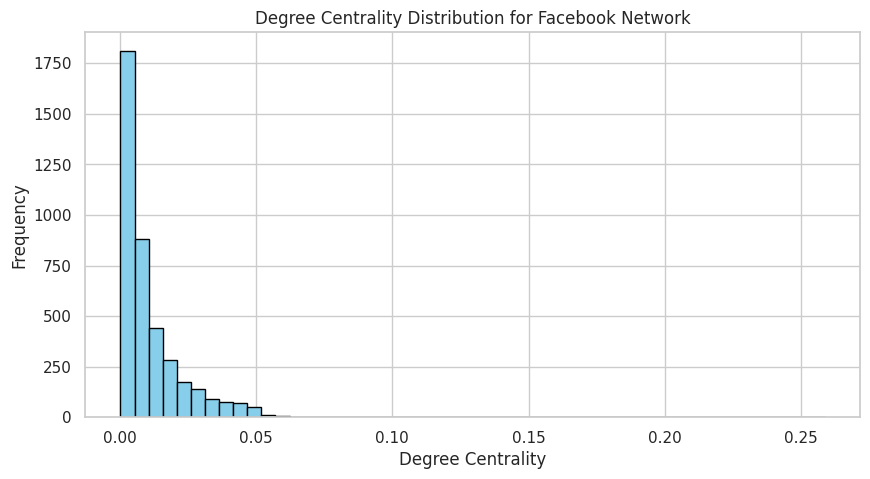

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the Facebook graph from the edge list
file_path = "/content/facebook_combined.txt"
G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

# Step 2: Calculate Degree Centrality
deg_cent = nx.degree_centrality(G)

# Step 3: Get top 10 nodes by degree centrality
top_deg_cent = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Nodes by Degree Centrality")
print("Rank\tNode\tDegree Centrality")
for rank, (node, centrality) in enumerate(top_deg_cent, 1):
    print(f"{rank}\t{node}\t{centrality:.6f}")

# Step 4: Plot Degree Centrality Distribution
plt.figure(figsize=(10, 5))
plt.hist(list(deg_cent.values()), bins=50, color='skyblue', edgecolor='black')
plt.title('Degree Centrality Distribution for Facebook Network')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import networkx as nx
import gzip
import random
import matplotlib.pyplot as plt

# Load the Facebook (Ego) network
G = nx.read_edgelist('/content/facebook_combined.txt.gz', create_using=nx.Graph(), nodetype=int)

# Function to assign random activation probabilities from a node such that they sum to 1
def assign_probabilities(G):
    probabilities = {}
    for node in G:
        neighbors = list(G.neighbors(node))
        if len(neighbors) > 0:
            probs = [random.random() for _ in neighbors]
            total = sum(probs)
            probs = [p / total for p in probs]
            probabilities[node] = dict(zip(neighbors, probs))
    return probabilities

# Independent Cascade Model (ICM)
def run_ICM(G, activation_probs, start_node):
    active = set([start_node])
    new_active = set([start_node])
    steps = 0

    while new_active:
        next_active = set()
        for node in new_active:
            neighbors = G.neighbors(node)
            for nbr in neighbors:
                if nbr not in active:
                    prob = activation_probs.get(node, {}).get(nbr, 0)
                    if random.random() <= prob:
                        next_active.add(nbr)
                        active.add(nbr)
        new_active = next_active
        steps += 1
    return steps, len(active)

# Run test 5 times from random nodes
num_runs = 5
all_steps = []

activation_probs = assign_probabilities(G)
for i in range(num_runs):
    start = random.choice(list(G.nodes()))
    steps, reached = run_ICM(G, activation_probs, start)
    all_steps.append(steps)
    print(f"Run {i+1}: Start Node = {start}, Steps = {steps}, Nodes Reached = {reached}")

avg_steps = sum(all_steps) / len(all_steps)
print(f"\nAverage Number of Steps Required: {avg_steps}")
import random

def assign_probabilities(G):
    activation_probs = {}
    for node in G:
        neighbors = list(G.neighbors(node))
        if neighbors:
            probs = [random.random() for _ in neighbors]
            total = sum(probs)
            probs = [p / total for p in probs]
            activation_probs[node] = dict(zip(neighbors, probs))
    return activation_probs

def run_icm(G, activation_probs, start_node):
    active = set([start_node])
    new_active = set([start_node])
    steps = 0

    while new_active:
        next_active = set()
        for node in new_active:
            for nbr in G.neighbors(node):
                if nbr not in active:
                    prob = activation_probs.get(node, {}).get(nbr, 0)
                    if random.random() <= prob:
                        next_active.add(nbr)
                        active.add(nbr)
        new_active = next_active
        steps += 1
    return steps, len(active)

# Fixed seed node (e.g., node 0)
activation_probs_fixed = assign_probabilities(G)
steps_fixed, spread_fixed = run_icm(G, activation_probs_fixed, start_node=0)
print("Fixed Seed - Steps:", steps_fixed, "Nodes Reached:", spread_fixed)



Run 1: Start Node = 1018, Steps = 2, Nodes Reached = 2
Run 2: Start Node = 410, Steps = 1, Nodes Reached = 1
Run 3: Start Node = 2644, Steps = 2, Nodes Reached = 2
Run 4: Start Node = 2595, Steps = 5, Nodes Reached = 6
Run 5: Start Node = 1745, Steps = 6, Nodes Reached = 19

Average Number of Steps Required: 3.2
Fixed Seed - Steps: 6 Nodes Reached: 10


In [ ]:
import networkx as nx
import gzip
import random
import matplotlib.pyplot as plt

# Load the Facebook (Ego) network
G = nx.read_edgelist('/content/facebook_combined.txt.gz', create_using=nx.Graph(), nodetype=int)

results_random = []
activation_probs_random = assign_probabilities(G)

for i in range(5):
    seed = random.choice(list(G.nodes()))
    steps, spread = run_icm(G, activation_probs_random, seed)
    results_random.append((seed, steps, spread))
    print(f"Run {i+1} | Seed: {seed} | Steps: {steps} | Nodes Reached: {spread}")

# Compute average
avg_steps = sum([s for _, s, _ in results_random]) / len(results_random)
avg_spread = sum([n for _, _, n in results_random]) / len(results_random)
print(f"\nAverage Steps (Random Seeds): {avg_steps:.2f}")
print(f"Average Spread (Random Seeds): {avg_spread:.2f}")


Run 1 | Seed: 703 | Steps: 11 | Nodes Reached: 23
Run 2 | Seed: 1582 | Steps: 9 | Nodes Reached: 27
Run 3 | Seed: 2887 | Steps: 2 | Nodes Reached: 2
Run 4 | Seed: 1136 | Steps: 7 | Nodes Reached: 10
Run 5 | Seed: 772 | Steps: 1 | Nodes Reached: 1

Average Steps (Random Seeds): 6.00
Average Spread (Random Seeds): 12.60


Seed node: 2018
Total activated nodes: 1


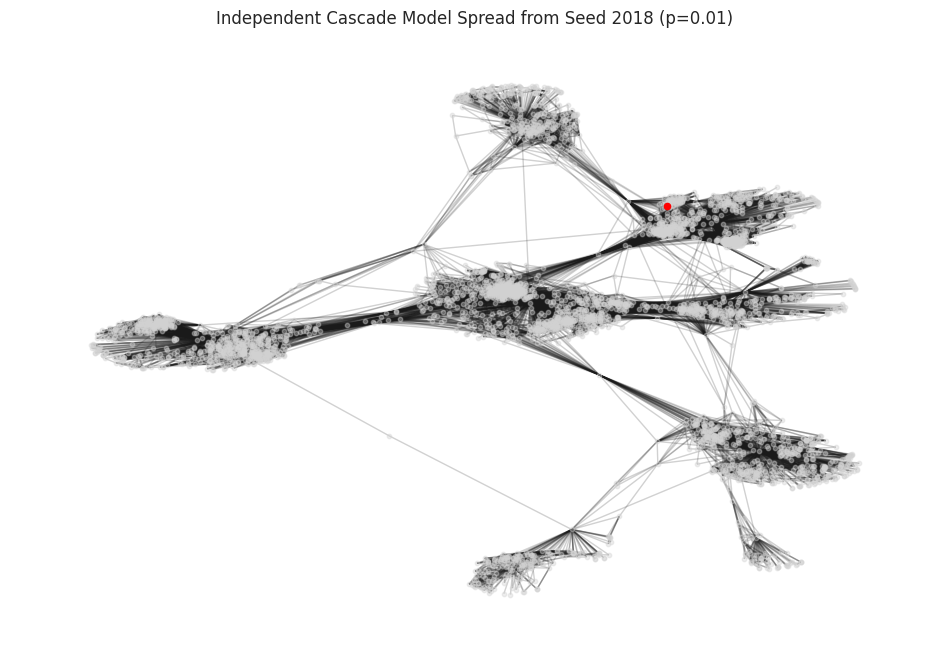

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the Facebook dataset
G = nx.read_edgelist("/content/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# ICM Parameters
p = 0.01  # Probability of activation
seed = random.choice(list(G.nodes()))  # Or set a specific seed, e.g., seed = 0

def independent_cascade(G, seed_nodes, p=0.01):
    active = set(seed_nodes)
    newly_active = set(seed_nodes)
    layers = [set(seed_nodes)]  # track activations per layer (time step)

    while newly_active:
        next_active = set()
        for node in newly_active:
            for neighbor in G.neighbors(node):
                if neighbor not in active:
                    if random.random() <= p:
                        next_active.add(neighbor)
        newly_active = next_active
        active.update(newly_active)
        if newly_active:
            layers.append(newly_active)

    return active, layers

# Run ICM from a single seed node
active_nodes, activation_layers = independent_cascade(G, [seed], p)

print(f"Seed node: {seed}")
print(f"Total activated nodes: {len(active_nodes)}")

# Visualization of the final activated nodes
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Draw inactive nodes in gray
inactive_nodes = set(G.nodes()) - active_nodes
nx.draw_networkx_nodes(G, pos, nodelist=inactive_nodes, node_color='lightgray', node_size=10, alpha=0.4)

# Draw activated nodes in red
nx.draw_networkx_nodes(G, pos, nodelist=active_nodes, node_color='red', node_size=20)

# Draw edges faintly
nx.draw_networkx_edges(G, pos, alpha=0.2)

plt.title(f"Independent Cascade Model Spread from Seed {seed} (p={p})")
plt.axis('off')
plt.show()


In [ ]:
import networkx as nx
import gzip
import shutil

# Extract the gz file
with gzip.open('/content/facebook_combined.txt.gz', 'rb') as f_in:
    with open('/content/facebook_combined.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Load the graph
G = nx.read_edgelist('/content/facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(f"Graph loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph loaded with 4039 nodes and 88234 edges.


In [ ]:
degree_centrality = nx.degree_centrality(G)


In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)


In [ ]:
# Katz Centrality
katz_centrality = nx.katz_centrality(G, alpha=0.005, beta=1.0, max_iter=1000)

# PageRank Centrality
pagerank_centrality = nx.pagerank(G)


In [ ]:
# Local Clustering Coefficient
local_clustering = nx.clustering(G)

# Global Clustering Coefficient (Transitivity)
global_clustering = nx.transitivity(G)


In [ ]:
# Convert to a directed version of the graph
DG = G.to_directed()

# Reciprocity
reciprocity = nx.reciprocity(DG)

# Transitivity is same as global clustering already computed
print("Reciprocity (on directed version of graph):", reciprocity)


Reciprocity (on directed version of graph): 1.0


In [ ]:
def print_top(centrality_dict, name, top_n=5):
    sorted_centrality = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    print(f"\nTop {top_n} nodes by {name}:")
    for node, score in sorted_centrality[:top_n]:
        print(f"Node {node}: {score:.4f}")

print_top(degree_centrality, "Degree Centrality")
print_top(eigenvector_centrality, "Eigenvector Centrality")
print_top(katz_centrality, "Katz Centrality")
print_top(pagerank_centrality, "PageRank")
print_top(betweenness, "Betweenness Centrality")
print_top(closeness, "Closeness Centrality")



Top 5 nodes by Degree Centrality:
Node 107: 0.2588
Node 1684: 0.1961
Node 1912: 0.1870
Node 3437: 0.1355
Node 0: 0.0859

Top 5 nodes by Eigenvector Centrality:
Node 1912: 0.0954
Node 2266: 0.0870
Node 2206: 0.0861
Node 2233: 0.0852
Node 2464: 0.0843

Top 5 nodes by Katz Centrality:
Node 1912: 0.0916
Node 107: 0.0790
Node 2347: 0.0609
Node 2543: 0.0584
Node 2266: 0.0570

Top 5 nodes by PageRank:
Node 3437: 0.0076
Node 107: 0.0069
Node 1684: 0.0064
Node 0: 0.0063
Node 1912: 0.0039

Top 5 nodes by Betweenness Centrality:
Node 107: 0.4805
Node 1684: 0.3378
Node 3437: 0.2361
Node 1912: 0.2293
Node 1085: 0.1490

Top 5 nodes by Closeness Centrality:
Node 107: 0.4597
Node 58: 0.3974
Node 428: 0.3948
Node 563: 0.3939
Node 1684: 0.3936
